In [14]:
import numpy as np
import scipy.stats as sts
import scipy.integrate as ing

def calculateExactQ(tau):
    exactQ = sts.norm.ppf(tau,loc=120,scale=15)
    return exactQ

def int_normal(y):
    f = sts.norm.pdf(y,loc=120,scale=15)
    return y * f

def calculateIntegrale(Q,c,p):
    t1 = p * ing.quad(int_normal,0,Q)[0]   
    t2 = p * Q * sts.norm.sf(Q,loc = 120,scale = 15)
    t3 = c * Q
    return t1 + t2 - t3

def muhatAndSigma2hat(vY):
    muhat = np.mean(vY)
    sigma2hat = np.var(vY)
    return muhat, sigma2hat

def parameterEstimatedQ(tau,muhat,sigmahat):
    estimatedQ = sts.norm.ppf(tau,loc=muhat,scale=sigmahat)
    return estimatedQ

def nonParameterEstimatedQ(tau,vY):
    n = len(vY)
    number = (int(np.ceil(tau * n))) - 1
    vZ = np.sort(vY)
    nonEstQ = vZ[number]
    return nonEstQ

def calcProfitNormal(Q,Y,c,p):
    profit = p * min(Q,Y) - c * Q
    return profit

def calcProfitPNP(Q,c,p,vY):
    sumProfit = 0
    for i in range(len(vY)):
        sumProfit += calcProfitNormal(Q,vY[i],c,p)
    expectedProfit = sumProfit / len(vY)
    return expectedProfit

M = 1000
n = 200
tau = 0.5
c = 1 - tau
p = 1

Qstar = calculateExactQ(tau)
maxExpectedProfit = calculateIntegrale(Qstar,c,p)

parM = np.zeros(M)
nonParM = np.zeros(M)

sumParPLR  = 0
sumNonParPLR = 0

for i in range(M):
    vY = sts.norm.rvs(loc = 120,scale = 15,size = n)
    muhat, sigma2hat = muhatAndSigma2hat(vY)
    sigmahat = np.sqrt(sigma2hat)
    parEstQ = parameterEstimatedQ(tau, muhat, sigmahat)
    nonParEstQ = nonParameterEstimatedQ(tau, vY)
    parExpProfit = calcProfitPNP(parEstQ,c,p,vY)
    nonParExpProfit = calcProfitPNP(nonParEstQ,c,p,vY)
    sumParPLR += np.abs((maxExpectedProfit - parExpProfit) / (maxExpectedProfit))
    sumNonParPLR += np.abs((maxExpectedProfit - nonParExpProfit) / (maxExpectedProfit))
parPLR = np.sqrt( (1 / M) * sumParPLR)
nonParPLR = np.sqrt( (1 / M) * sumNonParPLR)
ratioPLR = nonParPLR / parPLR
print('The PLR-ratio is: ', ratioPLR)



The PLR-ratio is:  0.998305296085282


In [8]:
from datetime import datetime
import pandas as pd


df = pd.read_excel("BakeryData_Vilnius.xlsx")
df["date"] = pd.to_datetime(df["date"])

begin = datetime(day = 31,month = 12,year = 2016)
pre_covid = datetime(day = 1,month = 3,year = 2021)
after_covid = datetime(day = 1,month = 3,year = 2022)
df = df[((df["date"] < pre_covid) | (df["date"] > after_covid))]
df["weekday_text"] = df['date'].dt.strftime('%A')
mainstreeta_weekday_row = df[df["weekday_text"]=="Monday"]["main street A"]
print(mainstreeta_weekday_row)

5       12.19
12       3.11
19       7.75
26       4.82
33       5.51
        ...  
2546    72.22
2553    45.59
2560    55.54
2567    39.70
2574    64.11
Name: main street A, Length: 315, dtype: float64


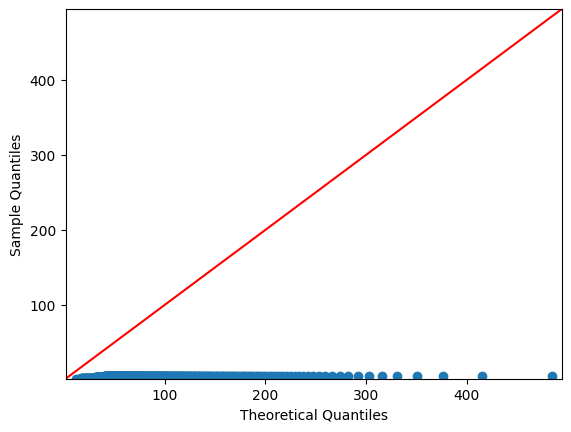

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.graphics.gofplots as sm 

def main():
    df = pd.read_excel('BakeryData_Vilnius.xlsx')
    
    datalist = df[df["weekday"]==5]
    
    datalist2 = np.array(datalist['main street A'])
    datalist2Log = np.log(datalist2)
    
    muhat = np.mean(np.log(datalist2))
    sigma2hat = np.var(np.log(datalist2))
    sigmahat = np.sqrt(sigma2hat)

    sm.qqplot(datalist2, sts.lognorm, distargs=(sigmahat,), loc=0, scale=np.exp(muhat), line='45')
    plt.show()

main()